# FUZZY Model

## Load the modules

In [1]:
import sys
sys.path.append('../src')
import Pyfuzzy as Fuzz
import numpy as np
import pylab as plt
import pandas as pd
%matplotlib inline

## Load the fuzzy model

In [2]:
f1=Fuzz.read_model('zr_simple.fis')      # 27 rules, 3*3*3 membership functions (soil, T, P))
# f1=Fuzz.read_model('zr_simple334.fis') # 36 rules, 3*4*3 membership functions
# f1=Fuzz.read_model('zr_simple344.fis') # 48 rules, 3*4*4 membership functions

## Visualize the model

('a0:', 50.0, 'b0:', 68.0)
('a1:', 50.0, 'b1:', 380.0)
('a:', 50.0, 'b:', 380.0, 'c:', 60.0)


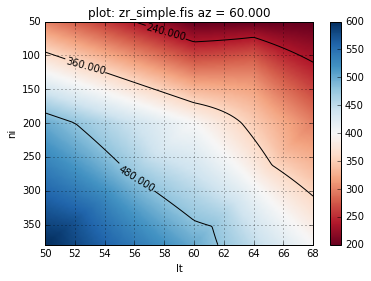

True

In [3]:
f1.show_model(tag1=0,default1=60)

('a0:', 20.0, 'b0:', 60.0)
('a1:', 50.0, 'b1:', 380.0)
('a:', 50.0, 'b:', 380.0, 'c:', 55.0)


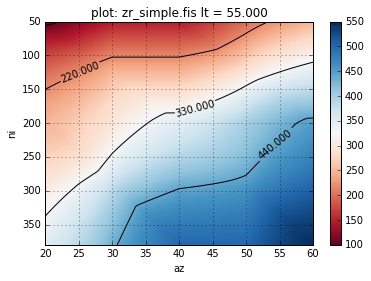

True

In [4]:
f1.show_model(tag1=1,default1=55)

('a0:', 20.0, 'b0:', 60.0)
('a1:', 50.0, 'b1:', 68.0)
('a:', 50.0, 'b:', 68.0, 'c:', 150.0)


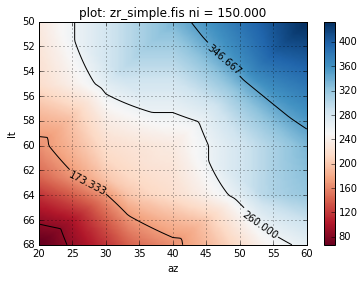

True

In [5]:
f1.show_model(tag1=2,default1=150)

## Generate samples from data

### Read the data in

In [6]:
ZR=pd.ExcelFile('ZR_Daten_DDR_1976_1990.xlsx')
df=ZR.parse("Tabelle1")
df[(df['ERTRAG (dt/ha)']<600) & (df['ERTRAG (dt/ha)']>100)] # exclude outliers

,FRUCHTART,ERNTEJAHR,NATUERLICHE_STANDORTEINHEIT,Mittlere Ackerzahl,TAG_AUSSAAT,TAG_AUFGANG,Tage Aussaat bis Aufgang,N_DUENGUNG,TAG_ERNTEABSCHLUSS,ERTRAG (dt/ha),...,NI_4,NI_5,NI_6,NI_7,NI_8,NI_9,NI_10,NI_11,NI_12,NI_4-10
0,Zuckerrüben zur Zuckergewinnun,1976,D5/N,48,116,134,18,200,311,275.0,...,19.3,61.7,12.5,30.2,9.2,37.6,62.3,29.9,28.4,33.257143
1,Zuckerrüben zur Zuckergewinnun,1976,D5/N,48,112,132,20,250,308,342.0,...,19.3,61.7,12.5,30.2,9.2,37.6,62.3,29.9,28.4,33.257143
2,Zuckerrüben zur Zuckergewinnun,1976,D4/N,36,118,137,19,185,306,279.0,...,19.3,61.7,12.5,30.2,9.2,37.6,62.3,29.9,28.4,33.257143
3,Zuckerrüben zur Zuckergewinnun,1977,D5/N,48,119,134,15,233,308,320.0,...,71.2,27.4,29.9,55.9,92.2,30.7,22.9,101.6,31.7,47.171429
4,Zuckerrüben zur Zuckergewinnun,1977,D4/N,36,128,142,14,185,301,285.0,...,71.2,27.4,29.9,55.9,92.2,30.7,22.9,101.6,31.7,47.171429
5,Zuckerrüben zur Zuckergewinnun,1977,D4/N,36,134,144,10,262,305,325.0,...,71.2,27.4,29.9,55.9,92.2,30.7,22.9,101.6,31.7,47.171429
6,Zuckerrüben zur Zuckergewinnun,1978,D5/N,48,110,136,26,240,307,264.0,...,15.3,21.5,88.4,57.3,55.8,115.8,38.5,23.4,79.8,56.085714
7,Zuckerrüben zur Zuckergewinnun,1978,D5/N,48,105,135,30,240,293,320.0,...,15.3,21.5,88.4,57.3,55.8,115.8,38.5,23.4,79.8,56.085714
8,Zuckerrüben zur Zuckergewinnun,1978,D5/N,48,118,137,19,220,306,259.0,...,15.3,21.5,88.4,57.3,55.8,115.8,38.5,23.4,79.8,56.085714
9,Zuckerrüben zur Zuckergewinnun,1979,D5/N,48,134,140,6,257,283,247.0,...,32.0,30.3,38.3,84.6,108.8,33.9,20.5,42.1,67.4,49.771429


### Remove yield trend (optionally)

In [7]:
df['ERTRAG (dt/ha)']-=(2.867*(df['ERNTEJAHR']-1976))    # 2.867 with range correction
#df['ERTRAG (dt/ha)']-=(1.96*(df['ERNTEJAHR']-1976))    # 1.96 without range correction

In [8]:
# df['ERTRAG (dt/ha)']-=(0.752*(df['TAG_AUSSAAT']-75))    # remove the sowing date

### Generate the training data TX, TY

In [9]:
Y=np.array(df['ERTRAG (dt/ha)'])
print np.mean(Y), np.std(Y)

286.104324105 92.0581543132


In [10]:
X=np.array([df['Mittlere Ackerzahl'],df['LT_6']+df['LT_7']+df['LT_8']+df['LT_9'],df['NI_6']+df['NI_7']+df['NI_8']+df['NI_9']])

In [11]:
X=X.T
print X.shape

(4551, 3)


In [12]:
index=np.arange(X.shape[0])
s=np.random.permutation(index)
sample=1000
TX=X[s[0:sample],:]
TY=Y[s[0:sample]]
print TX[0:10,:]
print TY[0:10]
print TX.shape

[[  48.    65.   205.5]
 [  59.    63.5  198.1]
 [  47.    65.3  226.5]
 [  51.    71.8  205. ]
 [  51.    70.7  225.5]
 [  36.    60.1  301.6]
 [  40.    67.5  212.9]
 [  75.    71.1  112. ]
 [  48.    57.8  273.1]
 [  48.    62.   207.9]]
[ 185.596  341.33   371.399  229.931  269.931  281.463  307.729  398.798
  182.763  241.33 ]
(1000, 3)


### 

In [13]:
f1.set_trainX(TX)
f1.set_trainY(TY)

### RSME before training

In [14]:
print f1.get_rmse(), f1.get_mae()

105.163314819 81.7564849854


### Example before training

In [15]:
for i in range(10):
    print TX[i,:], TY[i],f1.calc3(TX[i,0],TX[i,1],TX[i,2])

[  48.    65.   205.5] 185.596 272.356445312
[  59.    63.5  198.1] 341.33 352.639312744
[  47.    65.3  226.5] 371.399 266.078857422
[  51.    71.8  205. ] 229.931 257.24331665
[  51.    70.7  225.5] 269.931 267.067199707
[  36.    60.1  301.6] 281.463 340.782867432
[  40.    67.5  212.9] 307.729 208.083587646
[  75.    71.1  112. ] 398.798 241.333328247
[  48.    57.8  273.1] 182.763 393.210083008
[  48.    62.   207.9] 241.33 319.429656982


### Training

In [16]:
Fuzz.start_training(f1)

('minout:', [-100.0, 0.0, 100.0, 200.0, 300.0, 400.0, 500.0])
('maxout:', [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0])
('start:', [0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0])
 *************Result of Optimization*****************
('max:', 0.8820381164550781)
('parameter:', array([   0.        ,  166.66666667,  266.66666667,  300.        ,
        333.33333333,  433.33333333,  533.33333333]))


### Example after training

In [17]:
for i in range(10):
    print TX[i,:], TY[i],f1.calc3(TX[i,0],TX[i,1],TX[i,2])

[  48.    65.   205.5] 185.596 291.189727783
[  59.    63.5  198.1] 341.33 317.52166748
[  47.    65.3  226.5] 371.399 290.390197754
[  51.    71.8  205. ] 229.931 285.747741699
[  51.    70.7  225.5] 269.931 289.022399902
[  36.    60.1  301.6] 281.463 313.511505127
[  40.    67.5  212.9] 307.729 269.361175537
[  75.    71.1  112. ] 398.798 280.44442749
[  48.    57.8  273.1] 182.763 355.124267578
[  48.    62.   207.9] 241.33 307.481262207


In [18]:
print f1.get_rmse(), f1.get_mae()

89.5490646362 66.2239379883


In [19]:
f1.store_model('zr_simple_t.fis')

True